# Support Vector Machine for Automatic Speech Recognition

---
https://www.kaggle.com/anmour/svm-using-mfcc-features

https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85 : example of SVM

https://github.com/HareeshBahuleyan/music-genre-classification :code
https://www.groundai.com/project/music-genre-classification-using-machine-learning-techniques/1 :theory




( https://link.springer.com/chapter/10.1007/978-3-540-71505-4_11 )
Hidden Markov Models (HMMs) are, undoubtedly, the most employed core technique for Automatic Speech Recognition (ASR). Nevertheless, we are still far from achieving high-performance ASR systems.
The SVMs are effective discriminative classifiers with several outstanding characteristics, namely: their solution is that with maximum margin; they are capable to deal with samples of a very higher dimensionality; and their convergence to the minimum of the associated cost function is guaranteed.

In [22]:
import numpy as np 
from mega import Mega
import os
import zipfile
from zipfile import ZipFile 
import random
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
import itertools
from itertools import cycle

In [29]:
os.chdir(r'C:\Users\Goller\Desktop\audio-event-tagging\src\utils')
import load_file as ld

In [30]:
path=r"C:\Users\Goller\Desktop\audio-event-tagging\data\Audio"
os.chdir(path)

In [31]:
X_train,X_test,y_train,y_test=ld.get_data(path)

NameError: name 'train_test_split' is not defined

In [96]:
label_dict = {'Animal':0,
              'Humans':1,
              'Natural':2,
             }

In [97]:
#upload the file
file_name = "features_.zip"
zf = zipfile.ZipFile(file_name, 'r')
#print (len(zf.namelist()))

In [177]:
name=zf.namelist()[0]
file=zf.open(name)
dat=np.load(file,allow_pickle =True).tolist()
print(dat.keys())
mfcc=dat['mfcc']
mel=dat['mel_spec']
print(name.split('_')[1].split('.')[0])
#print(mfcc.tolist())
#print(mfcc.shape())
print(len(mfcc))

dict_keys(['mfcc', 'mel_spec'])
Animal
13


In [178]:
#in caso di mfcc
X=[np.load(zf.open(nam),allow_pickle =True).tolist()['mfcc'].reshape(1,-1) for nam in zf.namelist()]
y=[label_dict[nam.split('_')[1].split('.')[0]] for nam in zf.namelist()]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
#Train Dataset
min=10000
n=0
a=0
for i in range(len(X_train)):
    if len(X_train[a][0])>5602:
        X_train[a]=X_train[a][:,:5603]
    else:# len(X_train[a][0])<5603:
        print(len(X_train[a][0]))
        X_train.pop(a)
        y_train.pop(a)
        a=a-1
    a=a+1
print('######################')
#print(min)
#print(n)
print(len(X_train))

TypeError: object of type 'numpy.float32' has no len()

In [ ]:
#Test Dataset
a=0
for i in range(len(X_test)):
    if len(X_test[a][0])>5602:
        X_test[a]=X_test[a][:,:5603]
    else:# len(X_train[a][0])<5603:
        print(len(X_test[a][0]))
        X_test.pop(a)
        y_test.pop(a)
        a=a-1
    a=a+1

In [293]:
X_train=np.concatenate( X_train, axis=0 )
X_test=np.concatenate(X_test,axis=0)

In [294]:
X_train.shape

(2284, 5603)

In [295]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,5593,5594,5595,5596,5597,5598,5599,5600,5601,5602
0,-423.944519,-468.852386,-430.703583,-433.197662,-410.403656,-415.062958,-408.904785,-403.890472,-412.789886,-437.663269,...,3.735570,9.128991,5.622209,6.628633,4.470807,-1.387525,-13.116397,-0.581845,-5.251453,-5.938225
1,-469.142029,-491.049225,-494.804871,-455.922974,-473.286530,-478.637482,-484.900055,-475.243256,-389.862946,-330.454071,...,-8.506741,4.987606,7.290354,3.016026,10.156723,3.009419,15.237720,4.148272,-3.607663,-1.742479
2,-486.358978,-452.669342,-450.432465,-495.384644,-497.696686,-503.493774,-524.475647,-513.672607,-470.015045,-482.560242,...,-12.908150,-3.404469,-9.832006,-7.281941,-14.541088,-0.983107,-6.331010,0.483327,-6.589514,-8.191770
3,-320.932770,-343.089478,-325.709686,-330.596313,-318.510986,-227.760864,-189.309799,-180.790207,-164.004944,-163.383911,...,-10.998887,-10.210443,-14.726041,-33.452011,-6.968144,-23.223263,-24.800743,-4.898098,-15.565909,-4.342104
4,-443.593414,-412.576691,-369.556152,-347.279022,-351.577515,-352.752716,-365.057434,-385.898987,-418.262756,-447.128937,...,-19.107639,-20.091690,-24.508675,-18.043716,-15.044968,-25.580238,3.127724,-5.543790,-17.745823,-7.892416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,-537.486816,-522.746704,-524.803650,-530.463257,-523.959290,-521.158936,-525.323486,-522.615173,-520.987671,-532.134338,...,-11.536655,-11.776291,-22.585983,-9.793164,-9.258122,-5.261929,-13.714516,-11.293935,-1.100245,-2.836724
2280,-707.006470,-707.006470,-707.006470,-669.000183,-310.283722,-382.441345,-370.025909,-396.312012,-384.988647,-376.953583,...,-8.387574,-6.382051,2.583673,-3.708299,-0.391734,-1.407265,1.360905,2.042304,-0.908019,1.008731
2281,-213.021973,-273.786713,-272.690857,-309.429047,-340.531799,-379.776245,-388.082489,-400.893707,-414.057465,-434.301239,...,18.301914,8.829634,5.910110,14.816865,4.478171,36.764458,11.806629,-13.909948,-20.903969,-30.626034
2282,-616.184448,-581.051270,-567.438232,-574.944763,-582.676697,-562.643250,-520.101868,-511.155945,-504.909332,-509.615967,...,-8.411245,-1.034995,-1.217823,-7.567537,-10.154690,-8.897682,-8.493862,-4.136351,-7.823369,-2.059932


In [308]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(label_dict))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    #print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=label_dict.keys())

In [299]:
# Train
svm_classifier = SVC(C=10000.0, probability = True, kernel='rbf')
svm_classifier.fit(X_train, y_train)

# Predict
pred_probs = svm_classifier.predict_proba(X_test)

NameError: name 'accuracy_score' is not defined

Test Set Accuracy =  0.70
Test Set F-score =  0.30
Confusion matrix, without normalization
[[402  38   0]
 [  0   0   0]
 [ 62  75   0]]
Wall time: 333 ms


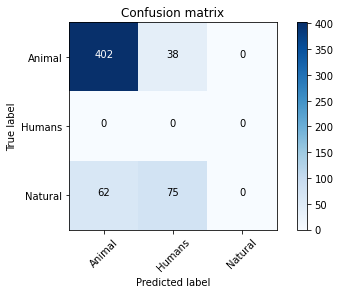

In [312]:
%%time
# Results
display_results(y_test, pred_probs)